<a href="https://colab.research.google.com/github/paulopetrillo/PROJETO_IFMA_SOFTEX/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# importa a biblioteca numpy
import numpy as np
print(np.__version__)

1.25.2


In [6]:
# importa biblioteca Pandas.
import pandas as pd
print(pd.__version__)

1.5.3


In [8]:
pip install xgboost

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# pacotes para regressão logistica
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [11]:
# # Grava datDataFrame_Geral em Googe drive
# #drive.mount('/content/drive')
# DataFrame_Geral.to_csv('./drive/MyDrive/DataFrame_Geral.csv')
# DataFrame_Geral= pd.read_csv("./drive/MyDrive/Colab Notebooks/DataFrame_Geral.csv", header=0, sep=",")
DataFrame_Geral = pd.read_csv("./drive/MyDrive/DataFrame_Geral.csv", header=0, sep=",")
DataFrame_Geral

,Unnamed: 0,mandante,golsMand,golsVist,vistante,poder_ataque_time_mandante,poder_ataque_time_visitante,poder_defesa_time_mandante,poder_defesa_time_visitante,classe_resultado
0,116,Atlético,4,3,São Paulo,9,6,8,5,1
1,117,Atlético,2,0,Santos,12,0,7,4,1
2,123,Sport,0,0,Atlético,6,11,9,12,0
3,130,Palmeiras,0,1,Internacional,8,5,5,4,2
4,131,Atlético,1,2,Botafogo,14,7,6,6,2
...,...,...,...,...,...,...,...,...,...,...
2535,375,Fortaleza - CE,2,1,Bahia - BA,6,1,5,6,1
2536,376,Sport - PE,1,1,Athletico Paranaense - PR,6,3,4,6,0
2537,377,Red Bull Bragantino - SP,1,0,Internacional - RS,8,1,3,6,1
2538,378,Juventude - RS,1,0,Corinthians - SP,4,3,1,9,1


In [13]:
DataFrame_XGBoost = DataFrame_Geral.copy()
DataFrame_XGBoost

,Unnamed: 0,mandante,golsMand,golsVist,vistante,poder_ataque_time_mandante,poder_ataque_time_visitante,poder_defesa_time_mandante,poder_defesa_time_visitante,classe_resultado
0,116,Atlético,4,3,São Paulo,9,6,8,5,1
1,117,Atlético,2,0,Santos,12,0,7,4,1
2,123,Sport,0,0,Atlético,6,11,9,12,0
3,130,Palmeiras,0,1,Internacional,8,5,5,4,2
4,131,Atlético,1,2,Botafogo,14,7,6,6,2
...,...,...,...,...,...,...,...,...,...,...
2535,375,Fortaleza - CE,2,1,Bahia - BA,6,1,5,6,1
2536,376,Sport - PE,1,1,Athletico Paranaense - PR,6,3,4,6,0
2537,377,Red Bull Bragantino - SP,1,0,Internacional - RS,8,1,3,6,1
2538,378,Juventude - RS,1,0,Corinthians - SP,4,3,1,9,1


In [14]:
# Apaga colunas desnecessarias para o treinamento.
DataFrame_XGBoost.drop(['mandante',
                             'golsMand',
                             'golsVist',
                             'vistante',
                             'Unnamed: 0'], axis=1, inplace=True)
DataFrame_XGBoost

,poder_ataque_time_mandante,poder_ataque_time_visitante,poder_defesa_time_mandante,poder_defesa_time_visitante,classe_resultado
0,9,6,8,5,1
1,12,0,7,4,1
2,6,11,9,12,0
3,8,5,5,4,2
4,14,7,6,6,2
...,...,...,...,...,...
2535,6,1,5,6,1
2536,6,3,4,6,0
2537,8,1,3,6,1
2538,4,3,1,9,1


In [15]:
# Definir as variáveis ​​preditoras e de resposta
features = DataFrame_XGBoost[['poder_ataque_time_mandante',
                                   'poder_ataque_time_visitante',
                                   'poder_defesa_time_mandante',
                                   'poder_defesa_time_visitante']]
target = DataFrame_XGBoost['classe_resultado']

In [25]:
# Divisão do conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=42)

In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [27]:
# Criar e treinar o modelo XGBoost
XGB_model = XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [28]:
# Fazer previsões no conjunto de teste
y_pred = XGB_model.predict(X_test)

In [29]:
# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Acurácia do modelo: {accuracy:.2f}')
print('Matriz de Confusão:')
print(conf_matrix)
print('Relatório de Classificação:')
print(class_report)

Acurácia do modelo: 0.42
Matriz de Confusão:
[[ 22 108  32]
 [ 60 213  52]
 [ 28  90  30]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.20      0.14      0.16       162
           1       0.52      0.66      0.58       325
           2       0.26      0.20      0.23       148

    accuracy                           0.42       635
   macro avg       0.33      0.33      0.32       635
weighted avg       0.38      0.42      0.39       635



In [31]:
import pickle

# Salva o modelo
with open('XGB_model.pkl', 'wb') as f:
    pickle.dump(XGB_model, f)

In [34]:
# Carregue o modelo
with open('XGB_model.pkl', 'rb') as f:
    XGB_model_loaded = pickle.load(f)

In [36]:
from sklearn import metrics
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Modelo Regressão logística')

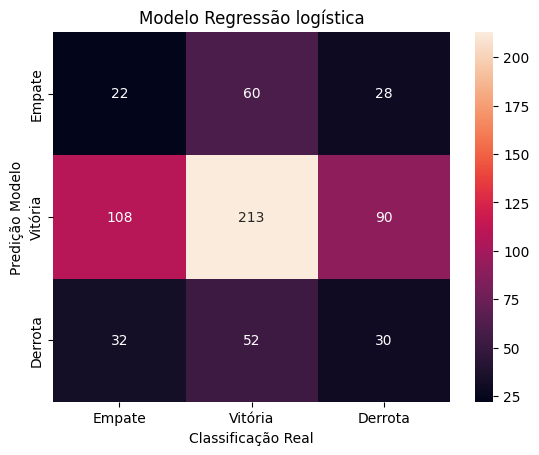

In [37]:
#imprimir a Matriz de Confusão para XGBoost
XGB_model_pred = XGB_model_loaded.predict(X_test)

XGB_model_cm = metrics.confusion_matrix(XGB_model_pred, y_test)

sns.heatmap(XGB_model_cm,
            annot=True,
            fmt='.0f',
            xticklabels = ["Empate", "Vitória", "Derrota"] ,
            yticklabels = ["Empate", "Vitória", "Derrota"]
            )

plt.ylabel('Predição Modelo')
plt.xlabel('Classificação Real')
plt.title('Modelo Regressão logística')

#Balanceamento de Carga - Oversampling


In [38]:
# Verificando distribuição das variáveis target
target.value_counts()

1    1258
0     674
2     608
Name: classe_resultado, dtype: int64

In [39]:
# Biblioteca para balanceamento de carga.
from imblearn.over_sampling import SMOTE

In [40]:
##### >>>> Solucao do erro da celula abaixo Sujerida pelo Google <<<< #####
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the target variable (target = y)
y_encoded = label_encoder.fit_transform(target)

# Apply SMOTE to the encoded target variable (features = X)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(features, y_encoded)

In [41]:
# Verificando distribuição das variáveis target após balancemaneto por overssample
y_df = y_resampled
y_DF = pd.DataFrame(y_df)
y_DF.value_counts()

0    1258
1    1258
2    1258
dtype: int64

In [42]:
# Divisão do conjunto de dados em treino e teste
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_resampled,
                                                                    y_resampled,
                                                                 test_size=0.25,
                                                                random_state=42)

In [44]:
# Criar e treinar o modelo XGBoost
XGB_model_bal = XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# Treinamento do modelo
XGB_model_bal = XGB_model_bal.fit(X_train_bal, y_train_bal)

In [45]:
# Imprime Acurácia do modelo
print("Acurácia do treinamento: %f" % XGB_model_bal.score(X_resampled, y_resampled))
print("Acurácia do teste: %f" % XGB_model_bal.score(X_test_bal, y_test_bal))

Acurácia do treinamento: 0.711712
Acurácia do teste: 0.485169


In [46]:
# Salva o modelo
with open('XGB_model_bal.pkl', 'wb') as f:
    pickle.dump(XGB_model_bal, f)

In [47]:
# Carregue o modelo
with open('XGB_model_bal.pkl', 'rb') as f:
    XGB_model_bal_loaded = pickle.load(f)

Text(0.5, 1.0, 'Modelo Regressão logística')

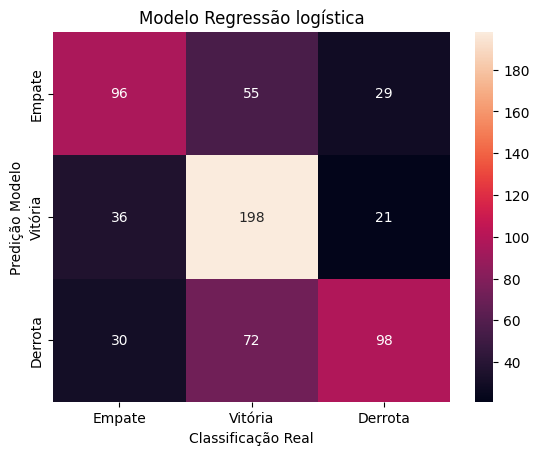

In [49]:
#imprimir a Matriz de Confusão para XGBoost
XGB_model_bal_pred = XGB_model_bal_loaded.predict(X_test)

XGB_model_bal_cm = metrics.confusion_matrix(XGB_model_bal_pred, y_test)

sns.heatmap(XGB_model_bal_cm,
            annot=True,
            fmt='.0f',
            xticklabels = ["Empate", "Vitória", "Derrota"] ,
            yticklabels = ["Empate", "Vitória", "Derrota"]
            )

plt.ylabel('Predição Modelo')
plt.xlabel('Classificação Real')
plt.title('Modelo Regressão logística')

In [52]:
# biblioteca para o método GridSearchCV.
from sklearn.model_selection import GridSearchCV

# Criar o modelo XGBoost
model = XGBClassifier()

In [53]:
# Definir os parâmetros que você deseja otimizar
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 3, 5]
}

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)

In [57]:
# Executar a pesquisa grid nos dados de treinamento <<<<<<<
XGB_model_bal_otm = grid_search.fit(X_train_bal, y_train_bal)

# Obter os melhores parâmetros encontrados
best_params = grid_search.best_params_

# Imprimir os melhores parâmetros
print("Melhores parâmetros encontrados:")
print(best_params)

# #############################################################
# Melhores parâmetros encontrados:
#  {'learning_rate': 0.1,
#   'max_depth': 7,
#   'min_child_weight': 1,
#   'n_estimators': 200
#   }

Melhores parâmetros encontrados:
{'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200}


In [58]:
# Fazer previsões no conjunto de teste com o melhor modelo
y_pred = grid_search.best_estimator_.predict(X_test)

# Avaliar o desempenho do modelo otimizado
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo otimizado: {accuracy:.2f}')

Acurácia do modelo otimizado: 0.61


In [59]:
# Salva o modelo
with open('XGB_model_bal_otm.pkl', 'wb') as f:
    pickle.dump(XGB_model_bal_otm, f)

In [60]:
# Carregue o modelo
with open('XGB_model_bal_otm.pkl', 'rb') as f:
    XGB_model_bal_otm_loaded = pickle.load(f)

Text(0.5, 1.0, 'Modelo Regressão logística')

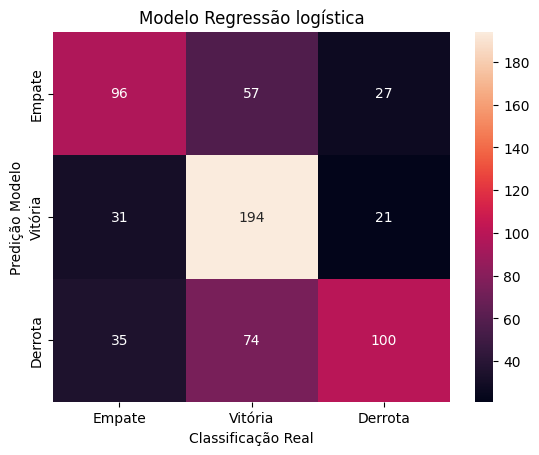

In [61]:
#imprimir a Matriz de Confusão para XGBoost
XGB_model_bal_otm_pred = XGB_model_bal_otm_loaded.predict(X_test)

XGB_model_bal_otm_cm = metrics.confusion_matrix(XGB_model_bal_otm_pred, y_test)

sns.heatmap(XGB_model_bal_otm_cm,
            annot=True,
            fmt='.0f',
            xticklabels = ["Empate", "Vitória", "Derrota"] ,
            yticklabels = ["Empate", "Vitória", "Derrota"]
            )

plt.ylabel('Predição Modelo')
plt.xlabel('Classificação Real')
plt.title('Modelo Regressão logística')

In [ ]:
# Gradient Boosting (por exemplo, XGBoost, LightGBM, CatBoost)